# Data cleaning ("Play Store")

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data 
playstore_df = pd.read_csv('Play Store Data.csv')

In [3]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# playstore_df.info()

In [5]:
 playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# Delete all the remaining null values 
playstore_df.dropna(inplace=True)

In [7]:
# Check unique values:-
# playstore_df['Installs'].unique() 
# playstore_df['Reviews'].unique()

In [8]:
# Convert all values in the 'Installs' to strings and remove special characters
playstore_df['Installs'] = ( playstore_df['Installs'].astype(str).str.replace(r'[^\d]', '', regex=True))

# Convert the cleaned values to integers
playstore_df['Installs'] = playstore_df['Installs'].astype(int)

In [9]:
# Change the data type of the column "Reviews"
playstore_df['Reviews'] = playstore_df['Reviews'].astype(int)

In [10]:
# Extract the numeric part of the Android version
playstore_df['Android Ver'] = playstore_df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float)

In [11]:
# playstore_df['Android Ver'].unique()

In [12]:
# Replace all the special symbols from "Price" column
playstore_df['Price'] = playstore_df['Price'].str.replace('$','').str.replace('Everyone','0').astype(float)

In [13]:
# Create a new column 'revenue'
playstore_df['revenue'] = playstore_df['Price']* playstore_df['Installs']

In [14]:
# playstore_df['Rating'].unique()
# playstore_df['Type'].unique()
# playstore_df['Content Rating'].unique()

In [15]:
playstore_df.shape

(9360, 14)

In [16]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     8041 non-null   float64
 13  revenue         9360 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


# Data cleaning ("User Reviews")

In [17]:
user = pd.read_csv('User Reviews.csv')

In [18]:
user.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [19]:
user.shape

(64295, 5)

In [20]:
user.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [21]:
# user['Sentiment_Subjectivity'].unique()

In [22]:
# fill all the null values with "no" for columns :  'Translated_Review' , 'Sentiment'
user[['Translated_Review','Sentiment']] = user[['Translated_Review','Sentiment']].fillna('no')

# fill all the null values with "0" for columns : 'Sentiment_Polarity'  , 'Sentiment_Subjectivity'  
user[['Sentiment_Polarity','Sentiment_Subjectivity']] = user[['Sentiment_Polarity','Sentiment_Subjectivity']].fillna('0')

In [23]:
user['Sentiment_Polarity'] = user['Sentiment_Polarity'].str.replace('-','').astype(float)
user['Sentiment_Subjectivity'] = user['Sentiment_Subjectivity'].astype(float)

In [24]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       64295 non-null  object 
 2   Sentiment               64295 non-null  object 
 3   Sentiment_Polarity      26863 non-null  float64
 4   Sentiment_Subjectivity  64295 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Merge both data set

In [25]:
# Inner join data
merged_df = pd.merge(playstore_df, user, on='App', how='inner')

In [26]:
merged_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,revenue,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,0.0,A kid's excessive ads. The types ads allowed a...,Negative,NaN,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,0.0,It bad >:(,Negative,NaN,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,0.0,like,Neutral,NaN,0.000000


#### Q1>  Create a scatter plot to visualize the relationship between revenue and the number of installs for paid
####      apps only. Add a trendline to show the correlation and color-code the points based on app categories.

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 800x400 with 0 Axes>

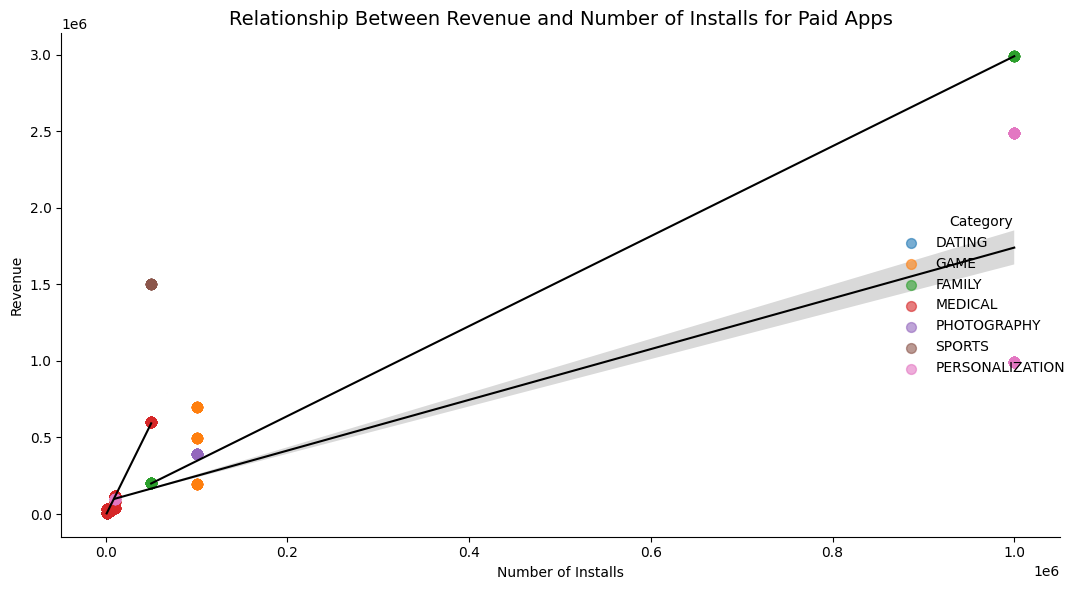

In [35]:
# Filter the DataFrame for paid apps only
paid_apps_df = merged_df[merged_df['Type'] == 'Paid']

# Set the figure size
plt.figure(figsize=(8, 4))

# Create the scatter plot with a trendline and color-code points by 'Category'
sns.lmplot(
    data=paid_apps_df,
    x='Installs',
    y='revenue',
    hue='Category',  # Color-code points based on 'Category'
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.6, 's': 50},  # Adjust transparency and point size
    line_kws={'color': 'black', 'linewidth': 1.5},  # Customize trendline
    markers='o'
)

# Add labels and title
plt.xlabel('Number of Installs')
plt.ylabel('Revenue')
plt.title('Relationship Between Revenue and Number of Installs for Paid Apps', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#### Q2> Create a dual-axis chart comparing the average installs and revenue for free vs. paid apps within the top 3
####     app categories. Apply filters to exclude apps with fewer than 10,000 installs and revenue below $10,000 and
####     android version should be more than 4.0 as well as size should be more than 15M and content rating should
####     be Everyone and app name should not have more than 30 characters including space and special character.
####     this graph should work only between 1 PM IST to 2 PM IST apart from that time we should not show this
####     graph in dashboard itself.

In [29]:
# Calculate the top 3 app categories based on the number of apps
top_categories = filtered_df['Category'].value_counts().head(3).index
filtered_df = filtered_df[filtered_df['Category'].isin(top_categories)]

# Group by category and type (Free or Paid), calculate average installs and revenue
aggregated_data = filtered_df.groupby(['Category', 'Type']).agg(
    Average_Installs=('Installs', 'mean'),
    Average_Revenue=('Revenue', 'mean')
).reset_index()

# Set up the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for Average Installs
sns.barplot(
    data=aggregated_data,
    x='Category',
    y='Average_Installs',
    hue='Type',
    ax=ax1,
    palette='Blues'
)
ax1.set_ylabel('Average Installs', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Comparison of Average Installs and Revenue for Free vs. Paid Apps')

# Create a second y-axis for Average Revenue
ax2 = ax1.twinx()
sns.lineplot(
    data=aggregated_data,
    x='Category',
    y='Average_Revenue',
    hue='Type',
    ax=ax2,
    marker='o',
    linestyle='--',
    palette='dark:red'
)
ax2.set_ylabel('Average Revenue', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adjust legend to avoid overlapping
ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='Type')
ax2.legend_.remove()

plt.tight_layout()
plt.show()


NameError: name 'filtered_df' is not defined

In [ ]:
merged_df.columns

In [ ]:
merged_df['Android Ver'].unique()
merged_df['Android Ver'].dropna(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame based on the provided conditions
filtered_df = merged_df[
    (merged_df['Installs'] >= 10000) &
    (merged_df['revenue'] >= 10000) &
    (merged_df['Android Ver'] > 4.0) &
    (merged_df['Size'] > 15) &  
    (merged_df['Content Rating'] == 'Everyone') &
    (merged_df['App'].str.len() <= 30)
]

In [ ]:
merged_df.iloc[5:60]